### Goal

In this capstone project, the goal is to build a classifier that can classify the tickets by analysing text.

### Dataset

Details about the data and dataset files are given in below link,
https://drive.google.com/file/d/1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ

In [205]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [206]:
tickets_df = pd.read_excel('Tickets.xlsx')
print(tickets_df.shape)
tickets_df.head()

(8500, 4)


,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


###  EDA

In [207]:
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Short description    8492 non-null object
Description          8499 non-null object
Caller               8500 non-null object
Assignment group     8500 non-null object
dtypes: object(4)
memory usage: 265.7+ KB


In [208]:
(tickets_df.isna() == True).sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [209]:
tickets_df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_15      39
GRP_30      39
GRP_42      37
          ... 
GRP_36      15
GRP_44      15
GRP_50      14
GRP_53      11
GRP_65      11
GRP_52       9
GRP_51       8
GRP_55       8
GRP_49       6
GRP_59       6
GRP_46       6
GRP_43       5
GRP_66       4
GRP_32       4
GRP_58       3
GRP_63       3
GRP_68       3
GRP_56       3
GRP_38       3
GRP_69       2
GRP_72       2
GRP_71       2
GRP_57       2
GRP_54       2
GRP_67       1
GRP_64       1
GRP_61       1
GRP_70       1
GRP_35       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

In [210]:
tickets_df = tickets_df.astype(str)

### Findings: 
####  Dataset has 8500 Documents(records) and 4 features(columns). 74 uniqe labes. 8 Titles and 1 Description is null.
#### Dataset is highly imbalanced and skewed ! Around 46% of the dataset is represented by just one class GRP_0. There are many classes that hardly have 1 datapoint. We would need to upsample the under represented class and downsample the strongly represented classes.

In [211]:
# rename columns to better make sense
tickets_df.rename(columns = {'Short description': 'Title'}, inplace = True)

In [212]:
tickets_df.head()

,Title,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [213]:
#tickets_df['Caller'].value_counts()

In [214]:
# Total number of words in the corpus
tickets_df['RawDescription'] = tickets_df['Title'].str.cat(tickets_df['Description'], sep=' ', na_rep=' ')
tickets_df.head()

,Title,Description,Caller,Assignment group,RawDescription
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


In [238]:
tickets_df['RawWordCount'] = [len(desc.split(' ')) for desc in tickets_df['RawDescription']]
tickets_df.head()
wordCount_before = clean_tickets_df['RawWordCount'].sum()

In [216]:
tickets_df.head()

,Title,Description,Caller,Assignment group,RawDescription,RawWordCount
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,6


### Visualization

#### Word Clould of "Title aka Short descrition" Column

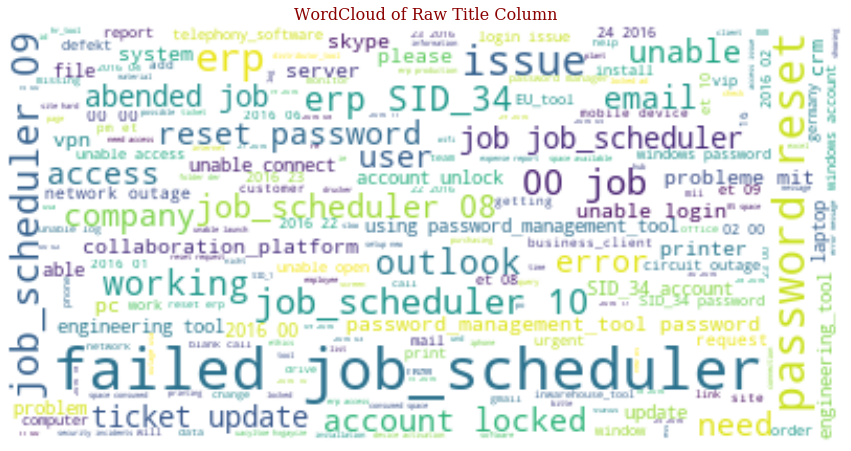

In [217]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

All_words = ""
All_words += " ".join(tickets_df.Title)
wordcloud = WordCloud(background_color='white', include_numbers=True).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Raw Title Column", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Word Cloud of "Description" Column

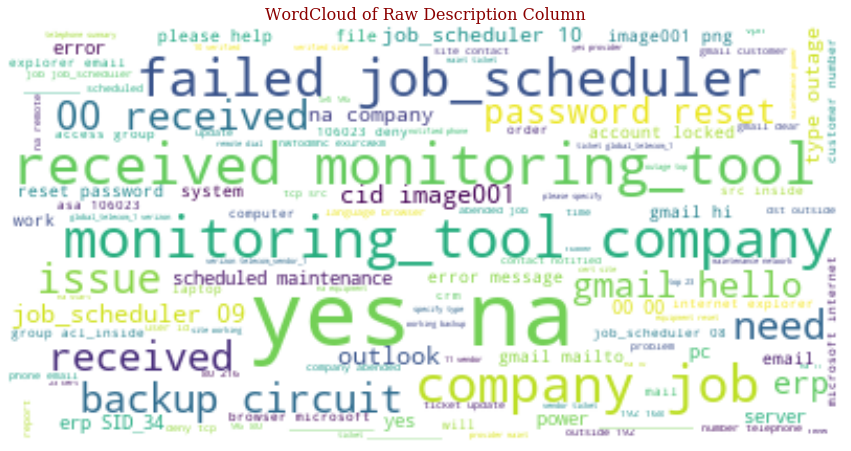

In [218]:
All_words = ""
All_words += " ".join(tickets_df.Description)
wordcloud = WordCloud(background_color='white', include_numbers=True).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Raw Description Column", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word Cloud of Raw Data for the corpus -  "FullDescription"

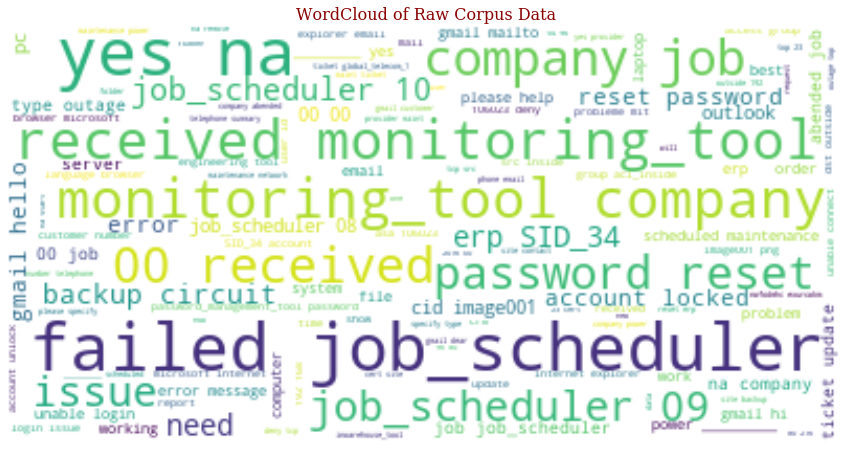

In [219]:
All_words = ""
All_words += " ".join(tickets_df.RawDescription)
wordcloud = WordCloud(background_color='white', include_numbers=True).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Raw Corpus Data", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

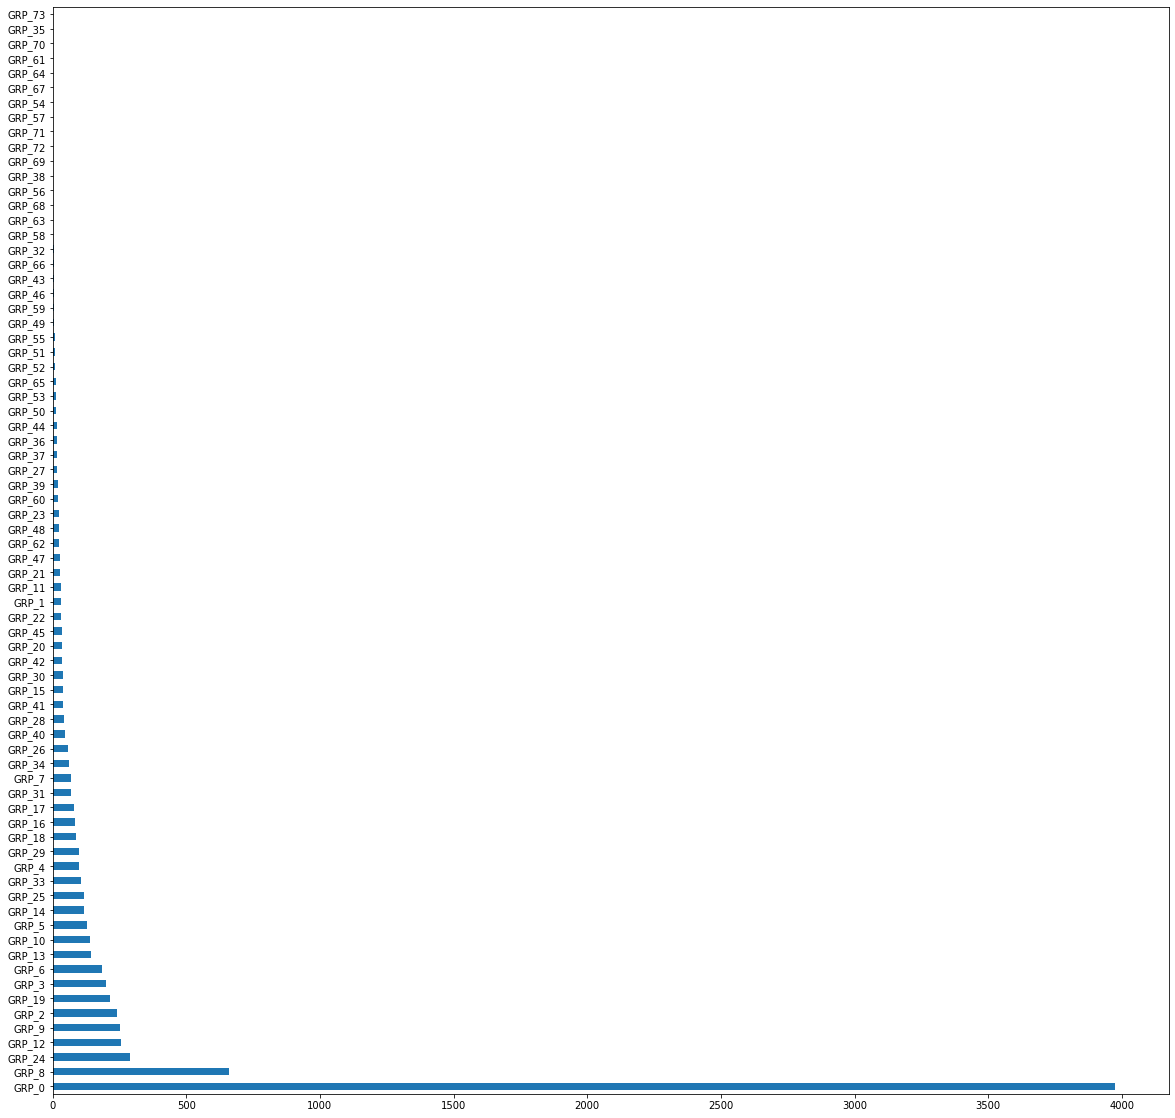

In [220]:
tickets_df['Assignment group'].value_counts().plot(kind='barh', figsize=(20,20))

In [221]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

### Data Pre-Processing

In [222]:
def removeString(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

In [223]:
def cleanDataset(dataset, columnsToClean, regexList):
    for column in columnsToClean:
        for regex in regexList:
            dataset[column] = removeString(dataset[column], regex)
    return dataset

In [224]:
def getRegexList():
    '''
    Adding regex list as per the given data set to flush off the unnecessary text
    
    '''
    regexList = []
    regexList += ['From:(.*)\r\n']  # from line
    regexList += ['Sent:(.*)\r\n']  # sent to line
    regexList += ['received from:(.*)\r\n']  # received data line
    regexList += ['received']  # received data line
    regexList += ['To:(.*)\r\n']  # to line
    regexList += ['CC:(.*)\r\n']  # cc line
    regexList += ['(.*)infection']  # footer
    regexList += ['\[cid:(.*)]']  # images cid
    regexList += ['https?:[^\]\n\r]+']  # https & http
    regexList += ['Subject:']
    regexList += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+']  # emails are not required
    regexList += ['[0-9][\-0–90-9 ]+']  # phones are not required
    regexList += ['[0-9]']  # numbers not needed
    regexList += ['[^a-zA-z 0-9]+']  # anything that is not a letter
    regexList += ['[\r\n]']  # \r\n
    regexList += [' [a-zA-Z] ']  # single letters makes no sense
    regexList += [' [a-zA-Z][a-zA-Z] ']  # two-letter words makes no sense
    regexList += ["  "]  # double spaces
    
    regexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$']
    regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regexList += ['Subject:']
    regexList += ['[^a-zA-Z]']

    return regexList

#### Remove text with Regex

In [225]:
tickets_df['CleanDescription'] = tickets_df['RawDescription']
# Select columns for cleaning
columnsToClean = ['CleanDescription']

# Create list of regex to remove sensitive data
# Clean dataset and remove sensitive data
clean_tickets_df = cleanDataset(tickets_df, columnsToClean, getRegexList())

In [226]:
clean_tickets_df.shape

(8500, 7)

In [227]:
clean_tickets_df.Description[1]

'\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind '

In [228]:
clean_tickets_df.head(10)

,Title,Description,Caller,Assignment group,RawDescription,RawWordCount,CleanDescription
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue verified user details employee ma...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24,outlook hello team meetings skype meetings e...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14,cant log to vpn cannot log to vpn best
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,unable access tool page unable access tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,6,skype error skype error
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,18,unable log to engineering tool and skype unabl...
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,event: critical:HostName_221.company.com the v...,21,event critical hostname company com the value...
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket_no1550391- employment status - new non-...,18,ticket employment status new non employee ent...
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...,14,unable disable add ins outlook unable disable ...
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant_874773 ticket update ...,8,ticket update inplant ticket update inplant


### NLP Essentials : Stopwords Removal & Text Normalization (Lemmetization)

#### Remove Stopwords

1. Text Classification
2. Spam Filtering
3. Language Classification
4. Genre Classification
5. Caption Generation
6. Auto-Tag Generation
 
#### Avoid Stopword Removal

1. Machine Translation
2. Language Modeling
3. Text Summarization
4. Question-Answering problems (Chatbots)

In [229]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
# We will not do stemming, instead use more intelligent way to get the root word using  lemmatization
from nltk.stem import WordNetLemmatizer

In [230]:
stop_words = set(stopwords.words('english')) 

In [231]:
#nltk.download('wordnet')

In [232]:
processed_all_documents = list()

for desc in clean_tickets_df['CleanDescription']:
    word_tokens = word_tokenize(desc) 
    
    filtered_sentence = [] 

    # Removing Stopwords
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    # Lemmetization
    lemma_word = []
    wordnet_lemmatizer = WordNetLemmatizer()
    for w in filtered_sentence:
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        lemma_word.append(word3)
    words = ' '.join(lemma_word)
    processed_all_documents.append(words)    

In [233]:
len(processed_all_documents)

8500

In [234]:
clean_tickets_df['CleanDescription'] = processed_all_documents

In [235]:
clean_tickets_df['CleanWordCount'] = [len(desc.split(' ')) for desc in clean_tickets_df['CleanDescription']]

wordCount_after = clean_tickets_df['CleanWordCount'].sum()
print("Total Words After StopWords Removal & Lemmetization: ", wordCount_after)
print("Max word count of a Document: ", clean_tickets_df['CleanWordCount'].max())
print("Mean word count of Documents: ", clean_tickets_df['CleanWordCount'].mean())

Total Words After StopWords Removal & Lemmetization:  181210
Max word count of a Document:  876
Mean word count of Documents:  21.318823529411766


In [236]:
clean_tickets_df.head()

,Title,Description,Caller,Assignment group,RawDescription,RawWordCount,CleanDescription,CleanWordCount
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue verify user detail employee manage...,24
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24,outlook hello team meet skype meet etc appear ...,15
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14,cant log vpn log vpn best,6
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,unable access tool page unable access tool page,8
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,6,skype error skype error,4


In [239]:
print("Difference in Total WordCount Before & After Data Preprocessing: ", (wordCount_before - wordCount_after))

Difference in Total WordCount Before & After Data Preprocessing:  126397


In [240]:
processed_all_documents

['login issue verify user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve',
 'outlook hello team meet skype meet etc appear outlook calendar somebody please advise correct kind',
 'cant log vpn log vpn best',
 'unable access tool page unable access tool page',
 'skype error skype error',
 'unable log engineer tool skype unable log engineer tool skype',
 'event critical hostname company com value mountpoint threshold oracle sid erpdata event critical hostname company com value mountpoint threshold oracle sid erpdata psa psa data perpsr psa',
 'ticket employment status new non employee enter user name ticket employment status new non employee enter user name',
 'unable disable add in outlook unable disable add in outlook',
 'ticket update inplant ticket update inplant',
 'engineer tool say connect unable submit report engineer tool say connect unable submit report',
 'hr tool site load page correctly tool site

### Label Encode the Target Column

In [245]:
le = preprocessing.LabelEncoder()
le.fit(clean_tickets_df["Assignment group"])
y_classes_len = len(le.classes_)
le.classes_
print(y_classes_len)
clean_tickets_df["Assignment group"] = le.transform(clean_tickets_df["Assignment group"])
clean_tickets_df.CleanDescription[0]

74


'login issue verify user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve'

### Creating Machine Learning Models

In [246]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report

In [248]:
y = np.asarray(clean_tickets_df['Assignment group'])

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(clean_tickets_df['CleanDescription'])

#print(x_train_counts[0])

tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

#print(x_train_tfidf)

train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, y, test_size=0.3)

In [249]:
print(len(count_vect.vocabulary_))

11906


In [250]:
train_x.shape

(5950, 11906)

In [251]:
train_y.shape

(5950,)

In [252]:
test_x.shape

(2550, 11906)

In [253]:
test_y.shape

(2550,)

In [254]:
train_x[0]

<1x11906 sparse matrix of type '<class 'numpy.float64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [312]:
compare_results = pd.DataFrame(columns=['Algorithm Name', 'F1 Score'])

### Logistic Regression

In [313]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("Logistic Regression Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted')
print("Logistic Regression F1 Score: ", f_sc)


Logistic Regression Score:  0.6337254901960784
Logistic Regression F1 Score:  0.5433779399577542


C:\Users\shard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\shard\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [314]:
compare_results = compare_results.append({'Algorithm Name': 'Logistic Regression', 'F1 Score': f_sc}, ignore_index=True)

### Naive Bayes

In [316]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("Naive Bayes Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted')
print("Naive Bayes F1 Score: ", f_sc)

Naive Bayes Score:  0.567843137254902
Naive Bayes F1 Score:  0.42621617219173236


C:\Users\shard\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [317]:
compare_results = compare_results.append({'Algorithm Name': 'Naive Bayes', 'F1 Score': f_sc}, ignore_index=True)

###  Support Vector Machine - Linear

In [318]:
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("SVM-Linerar Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted')
print("SVM F1 Score: ", f_sc)

SVM-Linerar Score:  0.6690196078431373
SVM F1 Score:  0.5966032052744562


C:\Users\shard\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [319]:
compare_results = compare_results.append({'Algorithm Name': 'Linear-SVM', 'F1 Score': f_sc}, ignore_index=True)

### Decision Trees

In [320]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(train_x, train_y)
model_entropy.score(train_x, train_y) # performance on train data - supposed to overfit

0.9485714285714286

In [321]:
model_entropy.score(test_x, test_y)  # performance on test data

0.5870588235294117

In [322]:
# Pruned Decision Trees
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(train_x, train_y)
preds_pruned = clf_pruned.predict(test_x)
preds_pruned_train = clf_pruned.predict(train_x)

In [323]:
print("Test results: ", accuracy_score(test_y,preds_pruned))
print("Train results: ", accuracy_score(train_y,preds_pruned_train))

Test results:  0.5517647058823529
Train results:  0.5364705882352941


In [324]:
f_sc = f1_score(test_y, preds_pruned, average='weighted')
print("Decision Tree F1 Score: ", f_sc)

Decision Tree F1 Score:  0.4181481003539102


C:\Users\shard\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [325]:
compare_results = compare_results.append({'Algorithm Name': 'Decision Trees', 'F1 Score': f_sc}, ignore_index=True)

### Random Forests - Ensemble Technique

In [326]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=150, random_state=100, bootstrap=False)
rfcl = rfcl.fit(train_x, train_y)
pred_RF = rfcl.predict(test_x)
acc_RF = accuracy_score(test_y, pred_RF)
print(acc_RF)

0.6666666666666666


In [327]:
f_sc = f1_score(test_y, pred_RF, average='weighted')
print("Random F1 Score: ", f_sc)

Random F1 Score:  0.6037468388650964


C:\Users\shard\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\shard\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [328]:
compare_results = compare_results.append({'Algorithm Name': 'Random Forests', 'F1 Score': f_sc}, ignore_index=True)

In [330]:
compare_results

,Algorithm Name,F1 Score
0,Logistic Regression,0.543378
1,Naive Bayes,0.426216
2,Linear-SVM,0.596603
3,Decision Trees,0.418148
4,Random Forests,0.603747


### Deep Learning Models : Work In Progress